In [2]:
import cv2

X = []
Y = []

def onMouse(event, x, y, flags, param):
   global X, Y
   if event == cv2.EVENT_LBUTTONDOWN:
        X.append(x)
        Y.append(y)

cap = cv2.VideoCapture('track2.mp4')

while cap.isOpened():
    flag, frame = cap.read()
    scale_percent = 60 # percent of original size
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)
    dim = (width, height)
  
# resize image
    resized = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    cv2.imshow('image', resized)
    cv2.setMouseCallback('image', onMouse)
    if cv2.waitKey(0) & 0xFF == ord('n'):
        continue
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

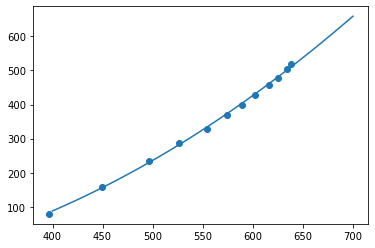

In [52]:
import numpy
import matplotlib.pyplot as plt

x = X[:12]
y = Y[:12]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 2))

myline = numpy.linspace(400, 700)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

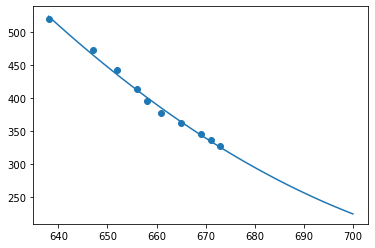

In [8]:
import numpy
import matplotlib.pyplot as plt

x = X[11:]
y = Y[11:]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 2))

myline = numpy.linspace(638, 700, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [1]:
X =  [396, 449, 496, 526, 554, 574, 589, 602, 616, 625, 634, 638, 647, 652, 656, 658, 661, 665, 669, 671, 673]
Y =  [79, 158, 235, 287, 329, 369, 400, 427, 456, 478, 504, 519, 473, 442, 414, 395, 377, 362, 346, 336, 328]

In [12]:
index = 1
a = []
b = []
for i in range(1, len(X)):
    if Y[i] > Y[i-1]:
        a.append(X[i-1])
        b.append(Y[i-1])
        index = index + 1
    else:
        a.append(X[i-1])
        b.append(Y[i-1])
        break
print(index)
print(a)
print(b)

12
[396, 449, 496, 526, 554, 574, 589, 602, 616, 625, 634, 638]
[79, 158, 235, 287, 329, 369, 400, 427, 456, 478, 504, 519]


0.9932227018068341
0.9987488700115168


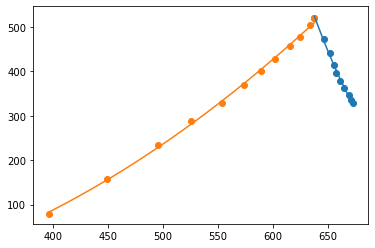

In [3]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = X[11:]
y = Y[11:]

a = X[:12]
b = Y[:12]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 2))

myline = numpy.linspace(638, 673, 100)

print(r2_score(y, mymodel(x)))

mymodel1 = numpy.poly1d(numpy.polyfit(a, b, 2))

myline1 = numpy.linspace(396, 638, 100)

print(r2_score(b, mymodel1(a)))

plt.scatter(x, y)
plt.scatter(a, b)
plt.plot(myline, mymodel(myline))
plt.plot(myline1, mymodel1(myline1))
plt.show()

In [15]:
print(X)
print(Y)

[355, 401, 446, 498, 528, 552, 573, 590, 604, 618, 626, 633, 640, 648, 652, 654, 656, 660, 664, 666, 670, 671, 654, 634, 617, 597, 577]
[20, 82, 159, 236, 287, 327, 369, 404, 429, 458, 476, 503, 518, 475, 448, 425, 404, 381, 364, 350, 339, 328, 340, 358, 378, 399, 421]


In [16]:
index = 1
a = []
b = []
for i in range(1, len(X)):
    if Y[i] > Y[i-1]:
        a.append(X[i-1])
        b.append(Y[i-1])
        index = index + 1
    else:
        a.append(X[i-1])
        b.append(Y[i-1])
        break
print(index)
print(a)
print(b)

13
[355, 401, 446, 498, 528, 552, 573, 590, 604, 618, 626, 633, 640]
[20, 82, 159, 236, 287, 327, 369, 404, 429, 458, 476, 503, 518]


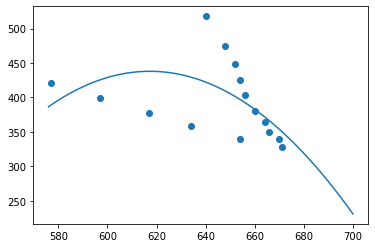

In [21]:
import numpy
import matplotlib.pyplot as plt

x = X[index - 1:]
y = Y[index - 1:]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 2))

myline = numpy.linspace(576, 700, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()


In [1]:
import os
import numpy as np
import cv2
from glob import glob


def create_dir(path):
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print(f"ERROR: creating directory with name {path}")


def save_frame(video_path, save_dir, gap=1):
    name = video_path.split("/")[-1].split(".")[0]
    save_path = os.path.join(save_dir, name)
    create_dir(save_path)

    cap = cv2.VideoCapture(video_path)
    idx = 0

    while True:
        ret, frame = cap.read()

        if ret == False:
            cap.release()
            break

        if idx == 0:
            cv2.imwrite(f"{save_path}/{idx}.png", frame)
        else:
            if idx % gap == 0:
                cv2.imwrite(f"{save_path}/{idx}.png", frame)

        idx += 1


if __name__ == "__main__":
    video_paths = glob("C:/Users/Lenovo/Downloads/ICBT-T20.mp4")
    save_dir = "D:/dataset/"

    for path in video_paths:
        save_frame(path, save_dir, gap=1)

KeyboardInterrupt: 

In [39]:
X =  [396, 449, 496, 526, 554, 574, 589, 602, 616, 625, 634, 638, 647, 652, 656, 658, 661, 665, 669, 671, 673]
Y =  [79, 158, 235, 287, 329, 369, 400, 427, 456, 478, 504, 519, 473, 442, 414, 395, 377, 362, 346, 336, 328]

In [2]:
import numpy

tempX = X[:5]
tempY = Y[:5]
X = X[5:]
Y = Y[5:]

model = numpy.poly1d(numpy.polyfit(tempX, tempY, 2))
while len(X) != 0:
    y = model(X[0])
    if(((y - 10) <= Y[0]) and ((y + 10) >= Y[0])):
        tempX.append(X[0])
        tempY.append(Y[0])
        X = X[1:]
        Y = Y[1:]
        model = numpy.poly1d(numpy.polyfit(tempX, tempY, 2))
    else:
        break

temp2X = X[:5]
temp2Y = Y[:5]
X = X[5:]
Y = Y[5:]

model2 = numpy.poly1d(numpy.polyfit(temp2X, temp2Y, 2))
while len(X) != 0:
    y = model2(X[0])
    if(((Y[0] - 10) <= y) and ((Y[0] + 10) >= y)):
        temp2X.append(X[0])
        temp2Y.append(Y[0])
        X = X[1:]
        Y = Y[1:]
        model2 = numpy.poly1d(numpy.polyfit(temp2X, temp2Y, 2))
    else:
        break
        
print("firstX =", tempX)
print("firstY =", tempY)
print("SecondX =", temp2X)
print("SecondY =", temp2Y)
print("RemainingX =", X)
print("RemainingY =", Y)

firstX = [54, 75, 95, 106, 122, 135, 146, 157, 165, 172, 183, 189, 196, 202, 209, 212, 220, 226, 229, 233, 239, 242, 244, 248, 252, 255, 258, 262, 264, 268, 269, 272, 275, 277, 280, 282, 284, 287, 286, 291, 293, 296, 295, 297, 298, 301, 301, 305, 305, 306, 305, 305, 308, 309, 310, 313, 315, 317, 321, 322]
firstY = [616, 602, 592, 581, 574, 566, 557, 550, 543, 538, 533, 528, 523, 519, 514, 510, 507, 503, 498, 495, 492, 490, 486, 484, 480, 477, 475, 473, 471, 470, 467, 464, 460, 460, 456, 456, 454, 451, 449, 448, 444, 443, 441, 439, 437, 436, 434, 432, 432, 430, 427, 426, 426, 423, 422, 420, 419, 414, 416, 418]
SecondX = [324, 325, 325, 327, 326]
SecondY = [423, 427, 434, 440, 446]
RemainingX = [329, 332, 333, 334, 335, 338, 338, 337]
RemainingY = [451, 455, 459, 466, 471, 472, 473, 474]


In [28]:
print(tempX)
print(tempY)

[54, 75, 95, 106, 122, 135, 146, 157, 165, 172, 183, 189, 196, 202, 209, 212, 220, 226, 229, 233, 239, 242, 244, 248, 252, 255, 258, 262, 264, 268, 269, 272, 275, 277, 280, 282, 284, 287, 286, 291, 293, 296, 295, 297, 298, 301, 301, 305, 305, 306, 305, 305, 308, 309, 310, 313, 315, 317, 321]
[616, 602, 592, 581, 574, 566, 557, 550, 543, 538, 533, 528, 523, 519, 514, 510, 507, 503, 498, 495, 492, 490, 486, 484, 480, 477, 475, 473, 471, 470, 467, 464, 460, 460, 456, 456, 454, 451, 449, 448, 444, 443, 441, 439, 437, 436, 434, 432, 432, 430, 427, 426, 426, 423, 422, 420, 419, 414, 416]


In [38]:
print(model)
print(model2)

            2
-0.0009685 x - 0.3699 x + 634.1
        2
-2.661 x + 1739 x - 2.838e+05


In [3]:
print(X)
print(Y)

[54, 75, 95, 106, 122, 135, 146, 157, 165, 172, 183, 189, 196, 202, 209, 212, 220, 226, 229, 233, 239, 242, 244, 248, 252, 255, 258, 262, 264, 268, 269, 272, 275, 277, 280, 282, 284, 287, 286, 291, 293, 296, 295, 297, 298, 301, 301, 305, 305, 306, 305, 305, 308, 309, 310, 313, 315, 317, 321, 322, 324, 325, 325, 327, 326, 329, 332, 333, 334, 335, 338, 338, 337]
[616, 602, 592, 581, 574, 566, 557, 550, 543, 538, 533, 528, 523, 519, 514, 510, 507, 503, 498, 495, 492, 490, 486, 484, 480, 477, 475, 473, 471, 470, 467, 464, 460, 460, 456, 456, 454, 451, 449, 448, 444, 443, 441, 439, 437, 436, 434, 432, 432, 430, 427, 426, 426, 423, 422, 420, 419, 414, 416, 418, 423, 427, 434, 440, 446, 451, 455, 459, 466, 471, 472, 473, 474]


In [4]:
print("X =", X)
print("Y =", Y)

X = [54, 75, 95, 106, 122, 135, 146, 157, 165, 172, 183, 189, 196, 202, 209, 212, 220, 226, 229, 233, 239, 242, 244, 248, 252, 255, 258, 262, 264, 268, 269, 272, 275, 277, 280, 282, 284, 287, 286, 291, 293, 296, 295, 297, 298, 301, 301, 305, 305, 306, 305, 305, 308, 309, 310, 313, 315, 317, 321, 322, 324, 325, 325, 327, 326, 329, 332, 333, 334, 335, 338, 338, 337]
Y = [616, 602, 592, 581, 574, 566, 557, 550, 543, 538, 533, 528, 523, 519, 514, 510, 507, 503, 498, 495, 492, 490, 486, 484, 480, 477, 475, 473, 471, 470, 467, 464, 460, 460, 456, 456, 454, 451, 449, 448, 444, 443, 441, 439, 437, 436, 434, 432, 432, 430, 427, 426, 426, 423, 422, 420, 419, 414, 416, 418, 423, 427, 434, 440, 446, 451, 455, 459, 466, 471, 472, 473, 474]


In [1]:
X = [54, 75, 95, 106, 122, 135, 146, 157, 165, 172, 183, 189, 196, 202, 209, 212, 220, 226, 229, 233, 239, 242, 244, 248, 252, 255, 258, 262, 264, 268, 269, 272, 275, 277, 280, 282, 284, 287, 286, 291, 293, 296, 295, 297, 298, 301, 301, 305, 305, 306, 305, 305, 308, 309, 310, 313, 315, 317, 321, 322, 324, 325, 325, 327, 326, 329, 332, 333, 334, 335, 338, 338, 337]
Y = [616, 602, 592, 581, 574, 566, 557, 550, 543, 538, 533, 528, 523, 519, 514, 510, 507, 503, 498, 495, 492, 490, 486, 484, 480, 477, 475, 473, 471, 470, 467, 464, 460, 460, 456, 456, 454, 451, 449, 448, 444, 443, 441, 439, 437, 436, 434, 432, 432, 430, 427, 426, 426, 423, 422, 420, 419, 414, 416, 418, 423, 427, 434, 440, 446, 451, 455, 459, 466, 471, 472, 473, 474]

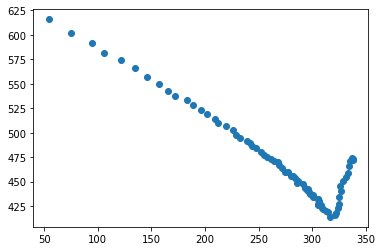

In [35]:
import matplotlib.pyplot as plt

plt.scatter(X, Y)